In [2]:
import numpy as np 
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
import cv2
import random
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical, plot_model
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from IPython.display import clear_output

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Dataset analysis

In this first section we will show an example of each class in the dataset and a histogram with the number of images per class.

<Figure size 576x576 with 0 Axes>

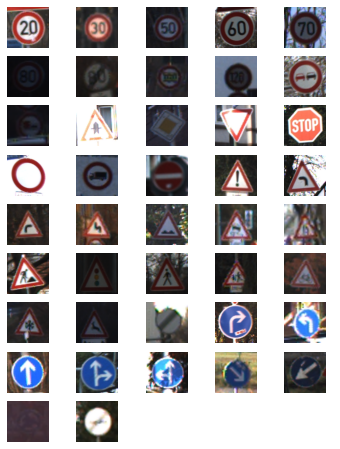

In [4]:
# DATASET ANALYSIS
data = []
labels = []
classes = 43

fig=plt.figure(figsize=(8, 8))

#fetching images and labels
for i in range(classes):
  path = os.path.join('drive','My Drive','TFG','dataset','Train',str(i))
  images = os.listdir(path)
  print('Reading 1 image from class ', i)
  random.shuffle(images)

  for a in images[0:1]:
    try:
      image = Image.open(path + '/'+ a)
      image = image.resize((250,250))
      image = np.array(image)
      #sim = Image.fromarray(image)
      data.append(image)
      labels.append(i)
    except:
      print("Error loading image")
      break

#chagning list to numpy array
data = np.array(data)
labels = np.array(labels)

clear_output()

w=13
h=13
fig=plt.figure(figsize=(6, 8))
columns = 5
rows = 9
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    if i < len(data):
      plt.imshow(data[i-1])
plt.show()

[210, 2220, 2250, 1410, 1980, 1860, 420, 1440, 1410, 1470, 2010, 1320, 2100, 2160, 780, 630, 420, 1110, 1200, 210, 360, 330, 390, 510, 270, 1500, 600, 240, 540, 270, 450, 780, 240, 689, 420, 1200, 390, 210, 2070, 300, 360, 240, 240]


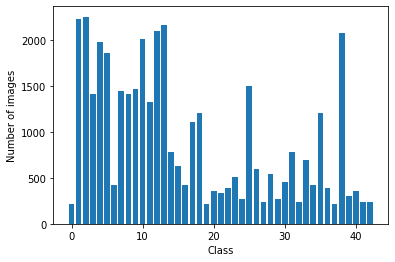

<Figure size 432x288 with 0 Axes>

In [48]:
from scipy.stats import gaussian_kde

classes = 43
x = []

for i in range(classes):
  path = os.path.join('drive','My Drive','TFG','dataset','Train',str(i))
  x.append(len(os.listdir(path)))

print(x)

# draw histogram
bins = list(range(43))

plt.bar(bins, x)


plt.ylabel('Number of images')
plt.xlabel('Class')
plt.show()
plt.savefig(os.path.join('drive','My Drive','TFG','dataset-histogram.svg'))

# Train and test dataset

Create the train and test dataset.

In [ ]:
data = []
labels = []
classes = 43

#fetching images and labels
for i in range(classes):
  path = os.path.join('drive','My Drive','TFG','dataset','Train',str(i))
  images = os.listdir(path)
  random.shuffle(images)
  print('Reading 30 images of {} from class {}'.format(len(images), i))

  images_read = 0
  im_count = 0
  while images_read < 30:
    try:
      image = Image.open(path + '/'+ images[im_count])
      image = image.resize((250,250))
      image = np.array(image)
      #sim = Image.fromarray(image)
      data.append(image)
      labels.append(i)
      images_read += 1
      im_count += 1
    except:
      print("Error loading image")
      im_count += 1
      break
#chagning list to numpy array
data = np.array(data)
labels = np.array(labels)

clear_output()
print(data.shape)
print(labels.shape)

(1290, 250, 250, 3)
(1290,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(1032, 250, 250, 3) (258, 250, 250, 3) (1032,) (258,)


# MODELS

Model 1

In [ ]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model 2

In [ ]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(7,7), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(7,7), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(1, 1)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=16, kernel_size=(1, 1), activation='relu'))
model.add(Conv2D(filters=16, kernel_size=(1, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(1, 1)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model 3

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(7,7), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(7,7), activation='relu'))
model.add(MaxPool2D(pool_size=(1, 1)))
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(1, 1)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training step

In [ ]:
network_num = 3
network_name = 'model.h5'

path = os.path.join('drive','My Drive','TFG','models',str(network_num))

# Save model image in drive
#model_image = plot_model(model, to_file=os.path.join(path,'model.png'))

epochs = 100

# Tensorboard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# ModelCheckpoint callback
checkpoint = ModelCheckpoint(os.path.join(path,network_name), 
                             monitor='loss', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False,
                             mode='auto', 
                             save_freq=5)

# Train
history_callback = model.fit(X_train,
                      y_train,
                      batch_size=32,
                      epochs=epochs,
                      validation_data=(X_test, y_test),
                      callbacks=[tensorboard_callback, checkpoint])

# Save metrics
loss_history = history_callback.history["loss"]
acc_history = history_callback.history["accuracy"]

fig, (axs1, axs2) = plt.subplots(1, 2)
axs1.set_title('Accuracy history')
axs2.set_title('Loss history')
axs1.plot(acc_history)
axs2.plot(loss_history, 'tab:orange')

np.savetxt(os.path.join(path, "loss_history" + str(network_num) + ".txt"), np.array(loss_history), delimiter=",")
np.savetxt(os.path.join(path, "acc_history" + str(network_num) + ".txt"), np.array(acc_history), delimiter=",")  

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard


# Start tensorboard
%tensorboard --logdir logs/fit

In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

# Predictions

In [ ]:
def decode_predictions(predictions):
  max_elem = np.max(predictions)
  result = np.where(predictions == max_elem)

  df = pd.read_csv(os.path.join('drive','My Drive','TFG','dataset','signnames.csv'))

  index = 4*result[0][0] + result[1][0]

  return df["SignName"][index]

Prediction:  Speed limit (30km/h)
KerasTensor(type_spec=TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name='conv2d_4_input'), name='conv2d_4_input', description="created by layer 'conv2d_4_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 43), dtype=tf.float32, name=None), name='dense_3/Softmax:0', description="created by layer 'dense_3'")


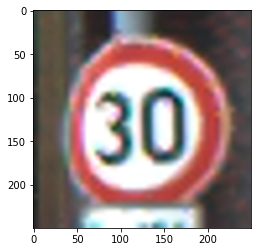

In [ ]:
network_num = 1
network_name = 'model_.h5'
path = os.path.join('drive','My Drive','TFG','models',str(network_num))

# Load the model
model = load_model(os.path.join(path, network_name))

# Load some image
im = Image.open(os.path.join('drive','My Drive','TFG','dataset','Test','00001.png')) # speed limit 30km/h
im = im.resize((250,250))
im = np.array(im)
im = im.reshape([1, im.shape[0], im.shape[1], im.shape[2]])

y = model.predict(im)

res = decode_predictions(y)

plt.imshow(im[0])
print("Prediction: ", res)

print(model.layers[0].input)
print(model.layers[-1].output)